## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in cells below and fit neural networks for solving the binary classification task.

## Task 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import mixed_precision

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
print(f"Devices: {tf.config.list_physical_devices()}")

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):
parent_dir = './dataset'
train = f'{parent_dir}/train'
val =   f'{parent_dir}/val'
test =  f'{parent_dir}/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64

## Prepare the data.

You don’t have to manually change the shapes of 25000 images and convert them into the necessary format for keras (img_width, img_height, 3).

We will use the built-in image preprocessing function _ImageGenerator()_.

It performs scaling, resizes selected images and prepares batches (mini-samples) to train the model.

In [14]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [15]:
nb_train_samples = train_generator.samples
nb_validation_samples = val_generator.samples
nb_test_samples = test_generator.samples

In [16]:
steps_per_epoch = nb_train_samples // batch_size
if nb_train_samples % batch_size != 0:
    steps_per_epoch += 1

validation_steps = nb_validation_samples // batch_size
if nb_validation_samples % batch_size != 0:
    validation_steps += 1

test_steps = nb_test_samples // batch_size
if nb_test_samples % batch_size != 0:
    test_steps += 1

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [17]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))

# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# 7:  +Flattening
model.add(Flatten())

# 8:  +Dense
model.add(Dense(64))
model.add(Activation('relu'))

# 9:  +Dropout
model.add(Dropout(0.5))

# 10: +Dense
model.add(Dense(1))
model.add(Activation('sigmoid'))

/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-12-13 23:14:49.979951: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-12-13 23:14:49.979990: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-12-13 23:14:49.980062: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-12-13 23:14:49.980087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-13 23:14:49.980106: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factor

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', #tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

### 10 Epochs

In [19]:
history_10 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps
)

/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-12-13 23:14:50.468922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.5423 - loss: 0.7699 - val_accuracy: 0.7145 - val_loss: 0.5643
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6713 - loss: 0.6340 - val_accuracy: 0.7639 - val_loss: 0.4910
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.7152 - loss: 0.5834 - val_accuracy: 0.7703 - val_loss: 0.4986
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7581 - loss: 0.5103 - val_accuracy: 0.7775 - val_loss: 0.4901
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7784 - loss: 0.4819 - val_accuracy: 0.7900 - val_loss: 0.4502
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.7969 - loss: 0.4479 - val_accuracy: 0.8096 - val_loss: 0.4453
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7980 - loss: 0.4458 - val_accuracy: 0.8000 - val_loss: 0.4384
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8164 - loss: 0.4231 - val_accurac

In [20]:
scores_10 = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores_10[1]*100}")

/opt/anaconda3/envs/tf_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8321 - loss: 0.3834
Accuracy on test data: 82.48000144958496


### 15 Epochs

In [21]:
history_15 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=15,
    validation_data=val_generator,
    validation_steps=validation_steps,
    initial_epoch=10
)

Epoch 11/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.8295 - loss: 0.4080 - val_accuracy: 0.8321 - val_loss: 0.4122
Epoch 12/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8259 - loss: 0.4037 - val_accuracy: 0.8317 - val_loss: 0.3989
Epoch 13/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8281 - loss: 0.4015 - val_accuracy: 0.8277 - val_loss: 0.3890
Epoch 14/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8325 - loss: 0.4056 - val_accuracy: 0.8357 - val_loss: 0.3875
Epoch 15/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.8406 - loss: 0.3855 - val_accuracy: 0.8321 - val_loss: 0.3946


In [22]:
scores_15 = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores_15[1]*100}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8197 - loss: 0.3903
Accuracy on test data: 82.63999819755554


### 20 Epochs

In [23]:
history_20 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=val_generator,
    validation_steps=validation_steps,
    initial_epoch=15,
)

Epoch 16/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8430 - loss: 0.3808 - val_accuracy: 0.8305 - val_loss: 0.4100
Epoch 17/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step - accuracy: 0.8473 - loss: 0.3732 - val_accuracy: 0.8112 - val_loss: 0.5570
Epoch 18/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.8374 - loss: 0.4055 - val_accuracy: 0.8285 - val_loss: 0.4327
Epoch 19/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.8446 - loss: 0.3926 - val_accuracy: 0.8233 - val_loss: 0.4869
Epoch 20/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8541 - loss: 0.3616 - val_accuracy: 0.8229 - val_loss: 0.4433


In [24]:
scores_20 = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores_20[1]*100}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8275 - loss: 0.4089
Accuracy on test data: 82.71999955177307


### Loss and Accuracy

In [25]:
def merge_history(h1, h2):

    history = {}
    for key in h1.keys():
        history[key] = h1[key] + h2[key]
    return history

history = merge_history(merge_history(history_10.history, history_15.history), history_20.history)

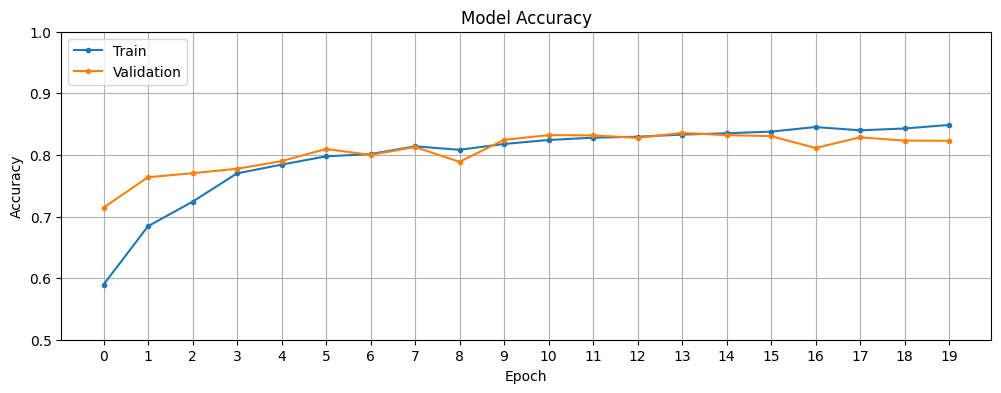

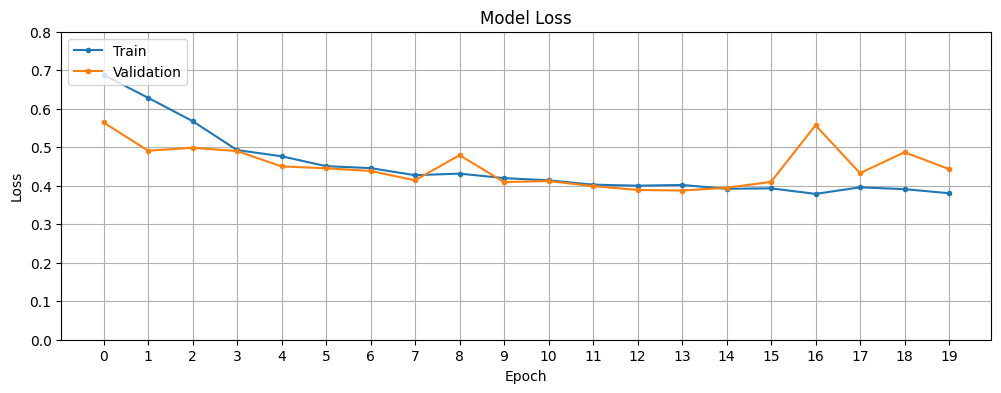

In [ ]:
plt.figure(figsize=(12, 4))

# Accuracy
plt.plot(history['accuracy'], marker='o', markersize=3)
plt.plot(history['val_accuracy'], marker='o', markersize=3)


plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.ylim(0.5,1)
plt.xticks(range(0,20))

plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')


# Learning Curves
plt.figure(figsize=(12, 4))

plt.plot(history['loss'], marker='o', markersize=3)
plt.plot(history['val_loss'], marker='o', markersize=3)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(0, 0.8)
plt.xticks(range(0,20))

plt.grid()
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [31]:
print('Test Accuracy')
print('='*20)
print('10 Epochs:', round(100*scores_10[1], 2))
print('15 Epochs:', round(100*scores_15[1], 2))
print('20 Epochs:', round(100*scores_20[1], 2))

Test Accuracy
10 Epochs: 82.48
15 Epochs: 82.64
20 Epochs: 82.72


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.optimizers import Adam

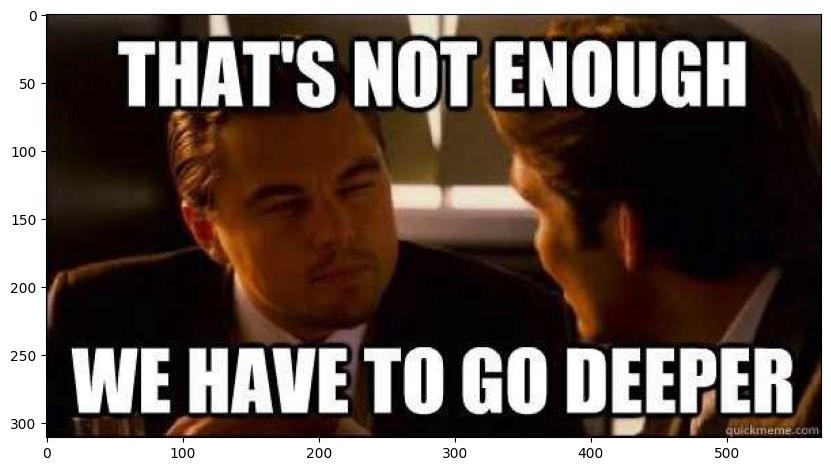

In [ ]:
img = mpimg.imread('/content/drive/My Drive/Deeper.jpeg')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()


Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

### VGG16

In [33]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
# add layers to VGG16:

model = Sequential()
model.add(vgg16_net)

# + flattening
model.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))

# + ReLu
model.add(Activation('relu'))

# + Dropout
model.add(Dropout(0.5))

# + Dense layer with 1 neuron
model.add(Dense(1))

# + sigmoid
model.add(Activation('sigmoid'))

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

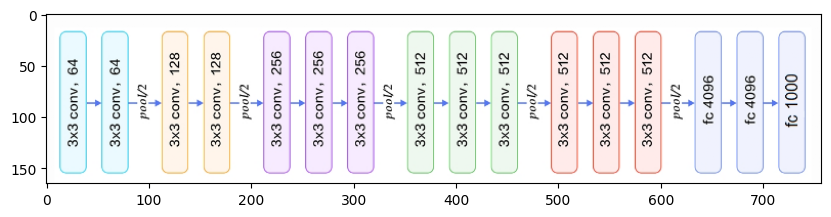

In [4]:
img = mpimg.imread('/content/drive/My Drive/VGG16.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

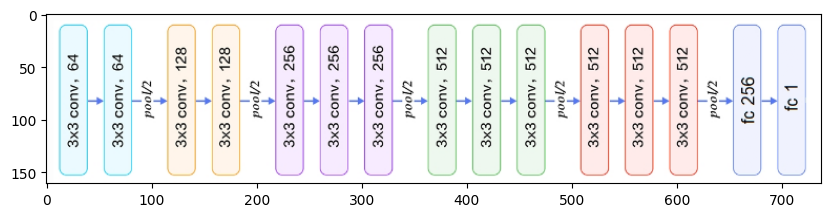

In [5]:
img = mpimg.imread('/content/drive/My Drive/VGG162.png')
plt.figure(figsize = (10,20))
plt.imshow(img)
plt.show()

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

E.g., it was like:


and it becomes:

In [51]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

history_vgg16 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=12,
    validation_data=val_generator,
    validation_steps=validation_steps)

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 203ms/step - accuracy: 0.6180 - loss: 0.7083 - val_accuracy: 0.8474 - val_loss: 0.3532
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 200ms/step - accuracy: 0.8109 - loss: 0.4003 - val_accuracy: 0.8799 - val_loss: 0.2968
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 205ms/step - accuracy: 0.8429 - loss: 0.3502 - val_accuracy: 0.8884 - val_loss: 0.2719
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.8566 - loss: 0.3176 - val_accuracy: 0.8940 - val_loss: 0.2571
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 199ms/step - accuracy: 0.8789 - loss: 0.2817 - val_accuracy: 0.9016 - val_loss: 0.2475
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 200ms/step - accuracy: 0.8812 - loss: 0.2740 - val_accuracy: 0.9036 - val_loss: 0.2410
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 201ms/step - accuracy: 0.8897 - loss: 0.2610 - val_accuracy: 0.9080 - val_loss: 0.2379
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.8921 - loss: 0

In [52]:
scores_vgg16 = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores_vgg16[1]*100}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - accuracy: 0.9009 - loss: 0.2289
Accuracy on test data: 90.31999707221985


### Xception

In [53]:
xception_net = Xception(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
xception_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

xception_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 74, 74,    │        864 │ input_layer_7[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 74, 74,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 74, 74,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 72, 72,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 72, 72,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 72, 72,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 72, 72,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 72, 72,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 72, 72,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 72, 72,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 72, 72,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 36, 36,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 36, 36,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 36,    │        512 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_24 (Add)        │ (None, 36, 36,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 36, 36,    │          0 │ add_24[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [54]:
# add layers to Xception:
model = Sequential()
model.add(xception_net)

# + flattening
model.add(Flatten())

# + Dense fullyconnected layer with 256 neurons
model.add(Dense(256))

# + ReLu
model.add(Activation('relu'))

# + Dropout
model.add(Dropout(0.5))

# + Dense layer with 1 neuron
model.add(Dense(1))

# + sigmoid
model.add(Activation('sigmoid'))

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [56]:
history_xception = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=val_generator,
    validation_steps=validation_steps)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 70s 219ms/step - accuracy: 0.9211 - loss: 0.1918 - val_accuracy: 0.9594 - val_loss: 0.1097
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 212ms/step - accuracy: 0.9631 - loss: 0.1178 - val_accuracy: 0.9651 - val_loss: 0.1091
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 212ms/step - accuracy: 0.9686 - loss: 0.0894 - val_accuracy: 0.9618 - val_loss: 0.1071
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.9700 - loss: 0.0935 - val_accuracy: 0.9614 - val_loss: 0.1153
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 212ms/step - accuracy: 0.9711 - loss: 0.0813 - val_accuracy: 0.9655 - val_loss: 0.1129
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 211ms/step - accuracy: 0.9737 - loss: 0.0729 - val_accuracy: 0.9639 - val_loss: 0.1163
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.9758 - loss: 0.0678 - val_accuracy: 0.9627 - val_loss: 0.1186
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.9786 - loss: 0

In [58]:
scores_xception = model.evaluate(test_generator, steps=test_steps)
print(f"Accuracy on test data: {scores_xception[1]*100}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.9598 - loss: 0.1317
Accuracy on test data: 95.80000042915344


### Learning Curves & Accuracy

In [65]:
def plot_accruacy_and_learning_curves(history, model):
    plt.figure(figsize=(14, 5))

    epochs = len(history['loss'])

    # Learning Curves
    plt.subplot(1,2,1)
    plt.plot(history['loss'], marker='o', markersize=3)
    plt.plot(history['val_loss'], marker='o', markersize=3)
    plt.title(f'{model.upper()} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

    plt.ylim(0)
    plt.xticks(range(0,epochs))

    plt.grid()
    plt.legend(['Train', 'Validation'], loc='upper left')


    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(history['accuracy'], marker='o', markersize=3)
    plt.plot(history['val_accuracy'], marker='o', markersize=3)


    plt.title(f'{model.upper()} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')

    plt.ylim(top=1)
    plt.xticks(range(0,epochs))

    plt.grid()
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

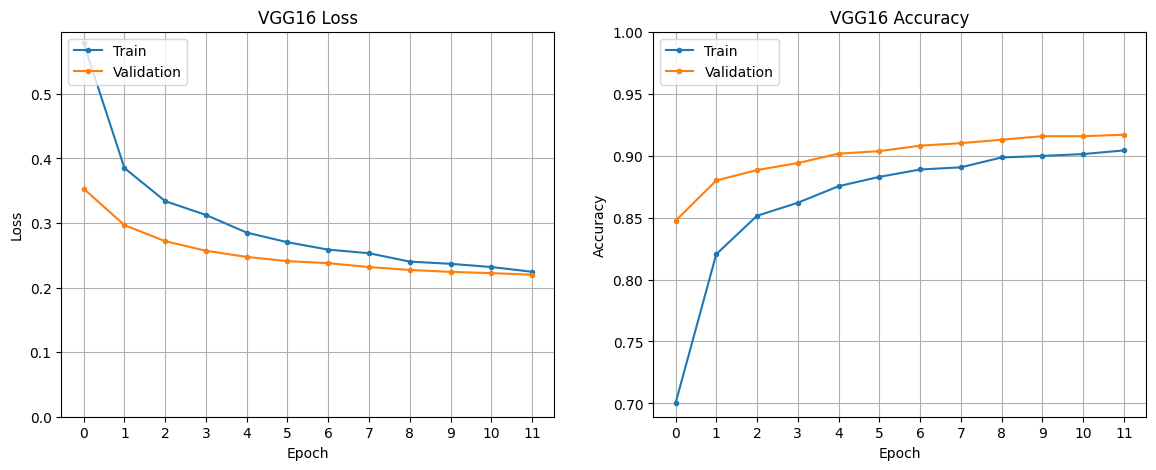

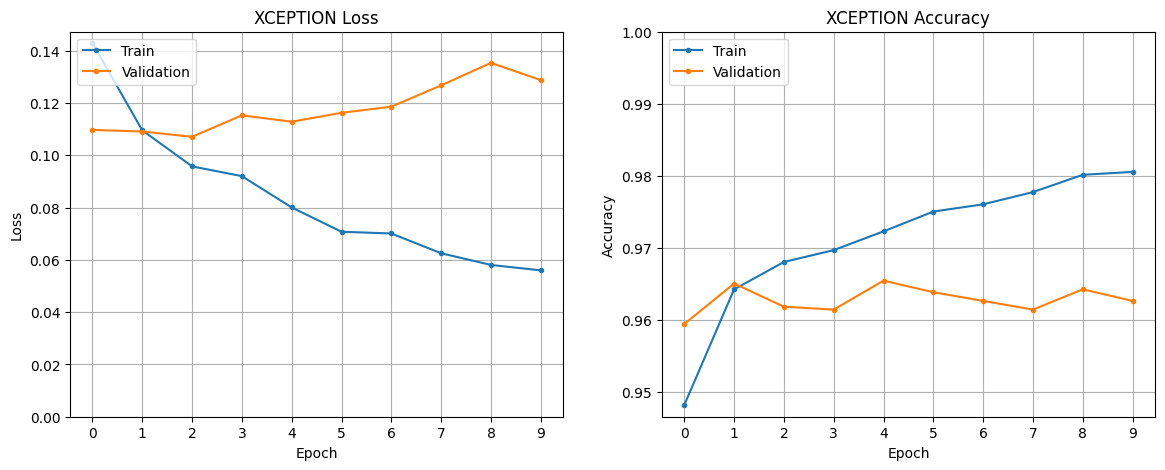

Test Accuracy
VGG16:    90.32
XCEPTION: 95.8


In [71]:
plot_accruacy_and_learning_curves(history_vgg16.history, 'vgg16')

plot_accruacy_and_learning_curves(history_xception.history, 'xception')

print('Test Accuracy')
print('='*20)
print('VGG16:   ', round(100*scores_vgg16[1], 2))
print('XCEPTION:', round(100*scores_xception[1], 2))

### Inference

In [108]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_pet(model, img_path, img_size=(150, 150), threshold=0.5):
    
    img = Image.open(img_path)
    img = img.resize(img_size)

    img_array = image.img_to_array(img)
    
    img_array = img_array / 255.0
    
    img_array = np.expand_dims(img_array, axis=0)
    
    prediction_prob = model.predict(img_array, verbose=0)[0][0]
    
    if prediction_prob >= threshold:
        predicted_class = "Dog"
    else:
        predicted_class = "Cat"

    confidence = prediction_prob if predicted_class == "Dog" else 1 - prediction_prob    
    return predicted_class, confidence, prediction_prob

def predict_visualize(img_path, model=model, threshold=0.5):

    predicted_class, confidence, raw_prob = predict_pet(model, img_path, img_size=(150, 150), threshold=threshold)

    img = Image.open(img_path)

    plt.figure(figsize=(8, 6))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2%}")
    plt.axis('off')
    plt.show()

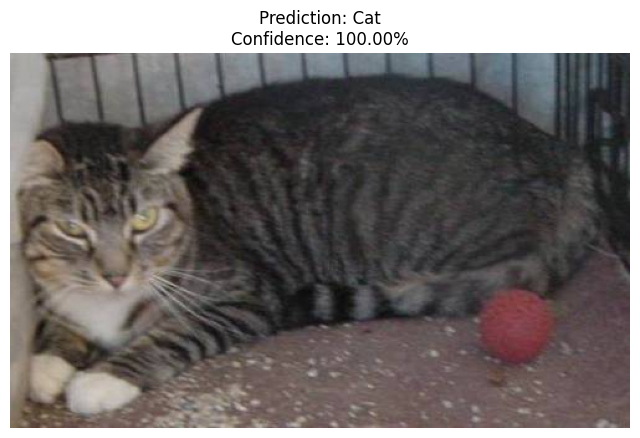

In [109]:
img_path = './dataset/test/cats/cat.10071.jpg'
predict_visualize(img_path)

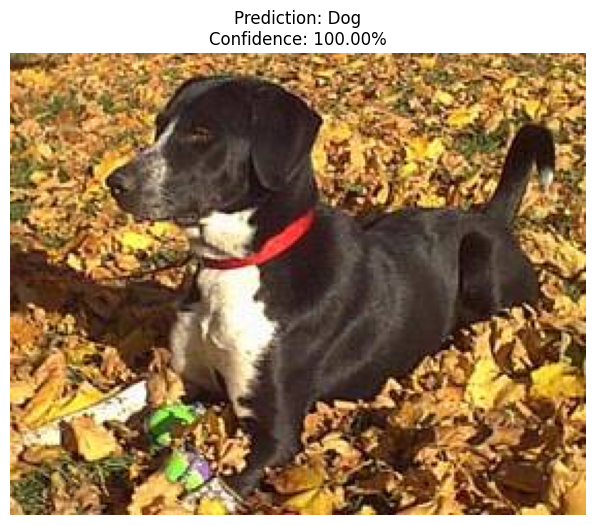

In [110]:
img_path = './dataset/test/dogs/dog.10071.jpg'
predict_visualize(img_path)

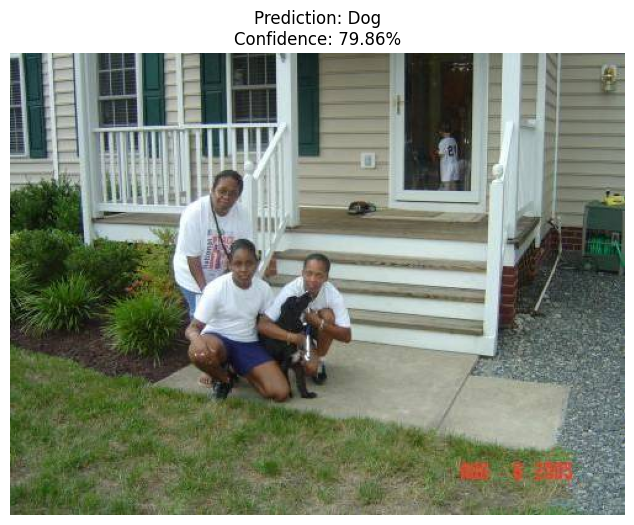

In [111]:
img_path = './dataset/train/dogs/dog.9931.jpg'
predict_visualize(img_path)

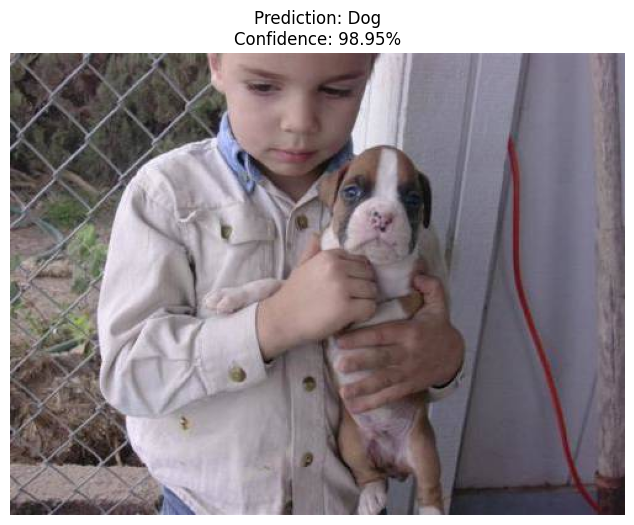

In [112]:
img_path = './dataset/test/dogs/dog.10573.jpg'
predict_visualize(img_path)

### Some OOD Examples

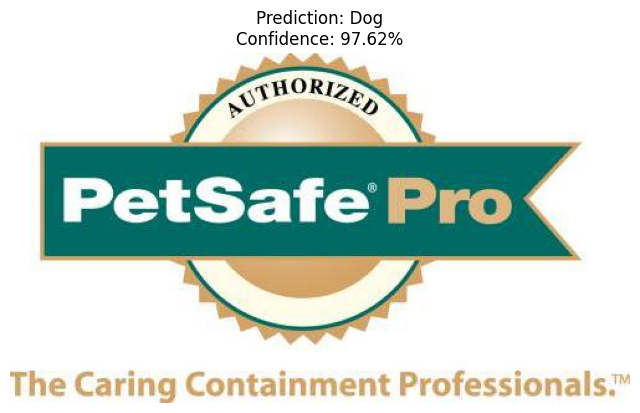

In [115]:
img_path = './dataset/test/cats/cat.10712.jpg'
predict_visualize(img_path)

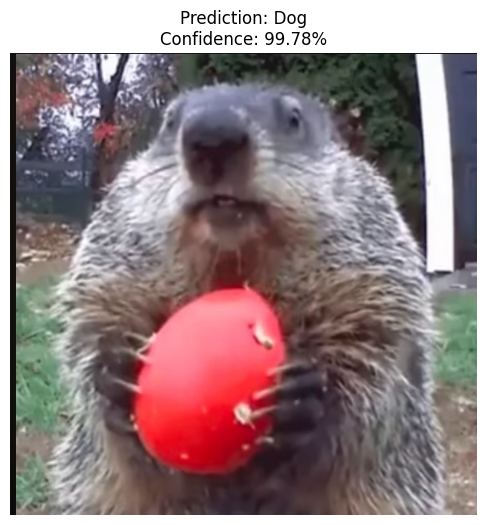

In [116]:
img_path = './dataset/inference_custom/1.jpg'
predict_visualize(img_path)

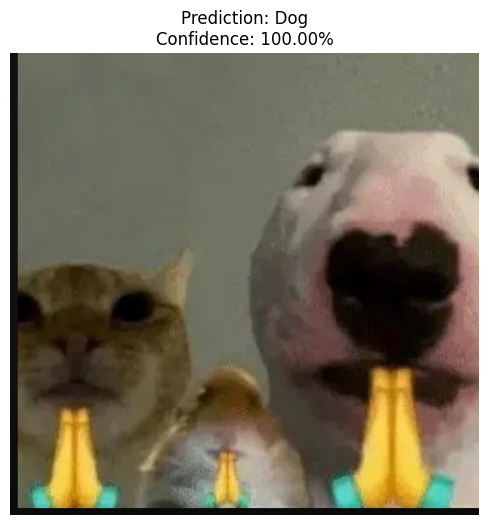

In [118]:
img_path = './dataset/inference_custom/2.jpg'
predict_visualize(img_path)

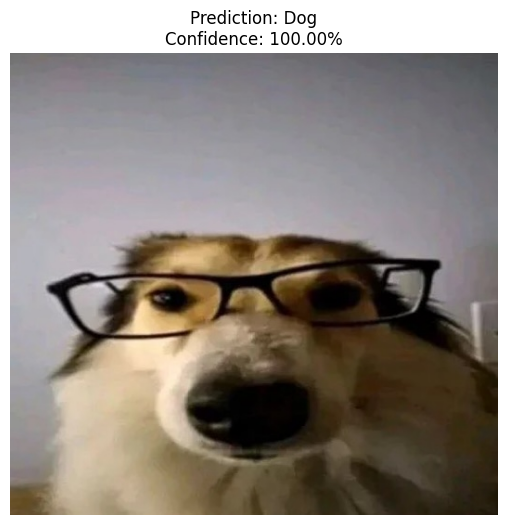

In [119]:
img_path = './dataset/inference_custom/3.jpg'
predict_visualize(img_path)

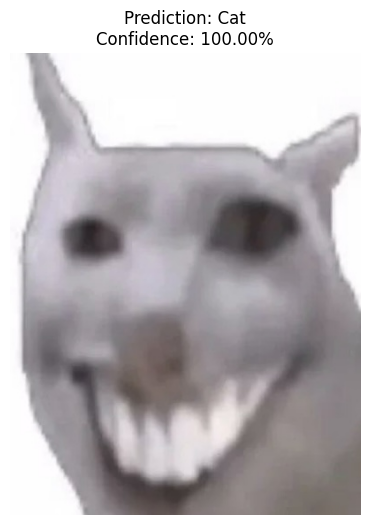

In [120]:
img_path = './dataset/inference_custom/4.jpg'
predict_visualize(img_path)

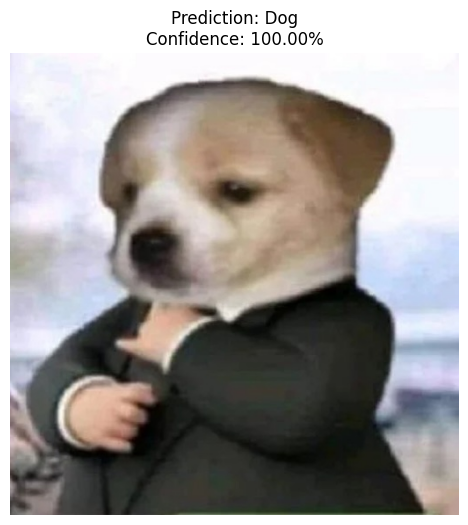

In [121]:
img_path = './dataset/inference_custom/5.jpg'
predict_visualize(img_path)

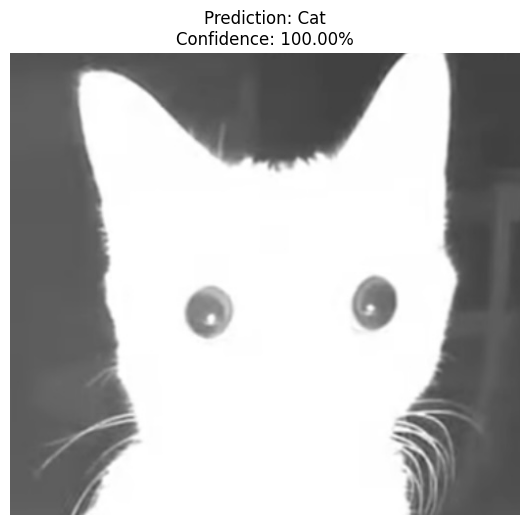

In [122]:
img_path = './dataset/inference_custom/6.jpg'
predict_visualize(img_path)

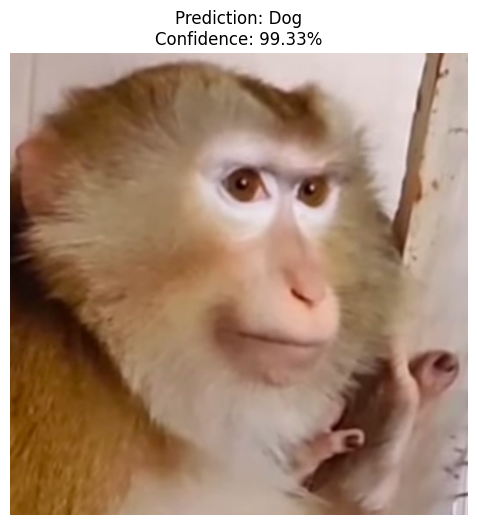

In [123]:
img_path = './dataset/inference_custom/7.jpg'
predict_visualize(img_path)

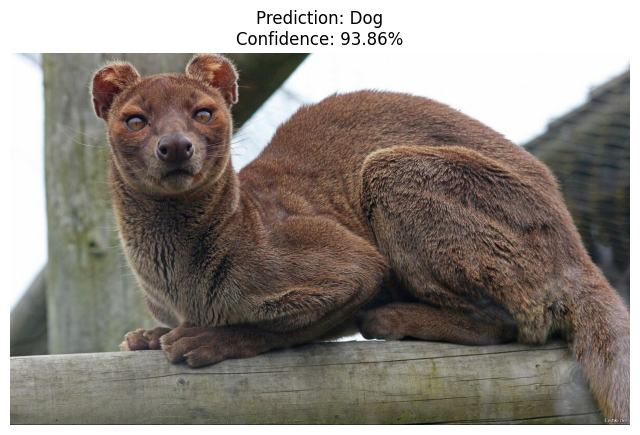

In [ ]:
# fossa
img_path = './dataset/inference_custom/8.jpeg'
predict_visualize(img_path)

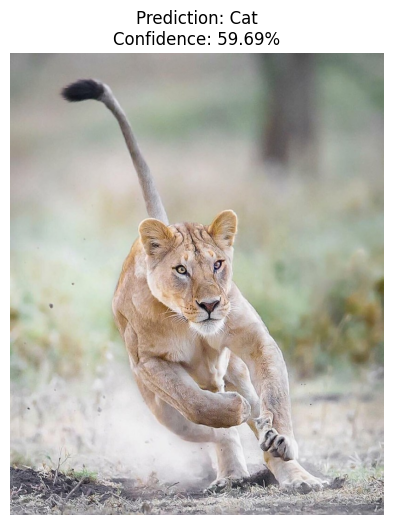

In [128]:
img_path = './dataset/inference_custom/9.jpg'
predict_visualize(img_path)